In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
adult_df = pd.read_csv("adult_data.csv", header=None, delimiter=' *, *')

adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_df.shape

(32561, 15)

In [4]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult_df.describe(include="all")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Pre processing the data.

In [6]:
# create a copy of the Dataframe
adult_df_rev = pd.DataFrame.copy(adult_df)

In [7]:
adult_df_rev.duplicated().sum()

24

In [8]:
adult_df_rev.drop_duplicates(inplace=True)

In [9]:
adult_df_rev.drop(["education", "fnlwgt"], axis=1, inplace=True)
adult_df_rev.shape

(32537, 13)

In [10]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
adult_df_rev.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

We have the right datatypes for the variables. SO Special characters are surely not present in the Numerical variables

In [12]:
# TO check the unique value in the data set
# TO detect the anomalies

for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

In [13]:
adult_df_rev.replace("?", np.nan, inplace=True)

In [14]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [15]:
adult_df_rev.shape

(32537, 13)

In [16]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

### Automate to impute the missing values


In [17]:
"""
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)
"""
#  All the missing values where the datatype of the column is object will be filled by the mode values 
# and the missing values where the datatype of the column is int will be filled by the mean or median values

"\nfor x in adult_df_rev.columns:\n    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)\n"

## Converting categorical data to numerical data:-


This technique allows us to decide what numerical values should be assigned to those categorical values
we can use the map or replace function to pass a dictionary and encode the values 
This approach is suitable only when we have few number of variables having few categories in it to encode or convert.
It can help us to maintain the ordinality in the data.

1.) manual Encoding --> map() / replace()

df.gender.replace({"F":0, "M":1}, inplace = True)

    Size :
    S -> 0
    M -> 1
    L -> 2
    XL -> 3

2.) Dummy Variables --> pd.get_dummies(), OneHotEncoder()
    
    -> This Technique allows us to create new dummy variables representing each unique categories in variable.
    -> This variables contain binary data where 1 indicates presences of the value and 0 indicates the absences of the value.
    -> The drawback of this technique is that it leads to high dimensionality problem, so it is ideally suitable where there are few variables each having few categories to be converted.
    -> Getdummies return the output in the form of data frame with the column headers whereas OneHotEncoder returns an array which is difficult to interpret.
    -> In case of get dummies we can also drop the first category variable in order to avoid trap.
    
    
    Region  Region-E  Region-W  Region-N   Region-S
       E       1         0         0          0
       W       0         1         0          0
       N       0         0         1          0
       S       0         0         0          1
       N       0         0         1          0
       W       0         1         0          0
       E       1         0         0          0
       
       
 3.) Creating Levels --> LabelEncoder()
 
    ->This Technique allows us to assign nemric labels to each unique category with in the existing variables without causing the high dimensionalty problem.
    -> The labels are assign as per the ascending alphabetical order.
    -> This technique is ideally suitable where there are more variables each having more number of categories to be converted.
    
    workclass
    Private --> 1
    Fed gov --> 0
    state gov --> 3
    Private --> 1
    self emp --> 2
    Fed Gov --> 0
    
    { Private:1,
      Fed gov:0,
      State Gov:3,
      Self emp : 2
    }

## Dummy Variable Using pd.get_dummies()

In [18]:
adult_df_rev_new = pd.get_dummies(adult_df_rev)
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,13,0,0,13,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,9,0,0,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
3,53,7,0,0,40,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,28,13,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [19]:
adult_df_rev_new.shape

(32537, 90)

In [20]:
colname = []


for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype == "object":
        colname.append(x)
        
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [21]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])  
"""
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))  ## le.classes_ is the label
    print('Feature', x)
    print('mapping', le_name_mapping)
""" 


### fit_transform() this is a combination of learning the model and transforming its values
### the fit is will create the dictionary and Transform will assign the values to it as per the ascii values

"\n    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))  ## le.classes_ is the label\n    print('Feature', x)\n    print('mapping', le_name_mapping)\n"

In [22]:
adult_df_rev.head()


# 0 --> <=50K
# 1 --> > 50K

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [23]:
data={"Gender":["Female", "Male","Female"] }
df=pd.DataFrame(data)
df.head()

,Gender
0,Female
1,Male
2,Female


In [24]:
le_gender=LabelEncoder()
df["Gender"]=le_gender.fit_transform(df["Gender"])
df.head()

,Gender
0,0
1,1
2,0


In [25]:
df["Gender"]=le_gender.inverse_transform(df["Gender"])
df.head()

,Gender
0,Female
1,Male
2,Female


In [26]:
X = adult_df_rev.values[:,0:-1]
Y = adult_df_rev.values[:,-1]

# .values will return an array whereas .iloc will return a df object
# arrays are lighter in weight which indirectly helps the model to build faster

In [27]:
print(X.shape)
print(Y.shape)

(32537, 12)
(32537,)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
# X = scaler.fit_transform(X)
# print(X)

In [29]:
print(X)

[[ 0.03038995  1.65772373  1.13477712 ... -0.21674317 -0.03566374
   0.25114627]
 [ 0.8369732   1.02582799  1.13477712 ... -0.21674317 -2.22248299
   0.25114627]
 [-0.0429358  -0.23796351 -0.42067868 ... -0.21674317 -0.03566374
   0.25114627]
 ...
 [ 1.42357919 -0.23796351 -0.42067868 ... -0.21674317 -0.03566374
   0.25114627]
 [-1.2161478  -0.23796351 -0.42067868 ... -0.21674317 -1.65552985
   0.25114627]
 [ 0.9836247   0.39393224 -0.42067868 ... -0.21674317 -0.03566374
   0.25114627]]


In [30]:
Y = Y.astype(int)

# Running the basic Model

In [31]:
from sklearn.model_selection import train_test_split

#Split the data into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [32]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("percent of train data =",X_train.shape[0]/X.shape[0]*100)

(22775, 12)
(22775,)
(9762, 12)
(9762,)
percent of train data = 69.99723391830838


In [33]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()
#train the model object
classifier.fit(X_train,Y_train)

#print intercept and coefficients
print(classifier.intercept_)  # this is "Beta 0"
print(classifier.coef_) # this gives Beta value

[-1.5098597]
[[ 0.47011114 -0.17439715  0.82707986 -0.34247689 -0.01675989 -0.19802862
   0.10643181  0.43002368  2.3224487   0.27969317  0.35253136  0.00633249]]


In [34]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [35]:
print(list(zip(Y_test,Y_pred)))
print()
print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel()))) # to flaten the 2d array
print()
print(classifier.intercept_)
print()
classifier.coef_

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0),

array([[ 0.47011114, -0.17439715,  0.82707986, -0.34247689, -0.01675989,
        -0.19802862,  0.10643181,  0.43002368,  2.3224487 ,  0.27969317,
         0.35253136,  0.00633249]])

# Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7012  384]
 [1294 1072]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.74      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8281089940585945


# Adjusting the threshold

With the intention of finding out the Optimum thershold we can chose the one which gives us the lowest total error and lowest type two error 

In [37]:
#store the predicted probailities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.89166452 0.10833548]
 [0.98726341 0.01273659]
 [0.97995728 0.02004272]
 ...
 [0.87440405 0.12559595]
 [0.97260929 0.02739071]
 [0.87327033 0.12672967]]


In [38]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.44:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Accuracy of the model: ",acc)
 
print("Classification report: ")
 
print(classification_report(Y_test,y_pred_class))
 
acc=accuracy_score(Y_test, y_pred_class)


[[6866  530]
 [1128 1238]]
Accuracy of the model:  0.8281089940585945
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7396
           1       0.70      0.52      0.60      2366

    accuracy                           0.83      9762
   macro avg       0.78      0.73      0.75      9762
weighted avg       0.82      0.83      0.82      9762



In [40]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1674  , type 2 error : 1017  , type 1 error: 657
Errors at threshold  0.41000000000000003 : 1664  , type 2 error : 1040  , type 1 error: 624
Errors at threshold  0.42000000000000004 : 1658  , type 2 error : 1066  , type 1 error: 592
Errors at threshold  0.43000000000000005 : 1660  , type 2 error : 1099  , type 1 error: 561
Errors at threshold  0.44000000000000006 : 1658  , type 2 error : 1128  , type 1 error: 530
Errors at threshold  0.45000000000000007 : 1660  , type 2 error : 1157  , type 1 error: 503
Errors at threshold  0.4600000000000001 : 1655  , type 2 error : 1176  , type 1 error: 479
Errors at threshold  0.4700000000000001 : 1656  , type 2 error : 1202  , type 1 error: 454
Errors at threshold  0.4800000000000001 : 1659  , type 2 error : 1229  , type 1 error: 430
Errors at threshold  0.4900000000000001 : 1669  , type 2 error : 1263  , type 1 error: 406
Errors at threshold  0.5000000000000001 : 1678  , type 2 error : 1294  , type 1 error: 384
Errors at

0.46 is the best threshold for the data so any future prediction should be done with same threshold

In [41]:
from sklearn import metrics
 
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
 
print(auc)


# ROC - Receiver Operating Characteristic
# AUC - Area Under Curve

0.8620498126286078


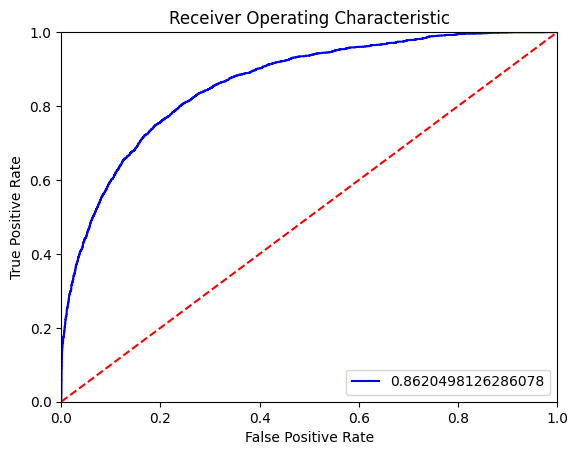

In [42]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

In [43]:
from sklearn import metrics
 
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
 
print(auc)
print(fpr)
print(tpr)

0.7257928139173718
[0.         0.07166036 1.        ]
[0.         0.52324598 1.        ]


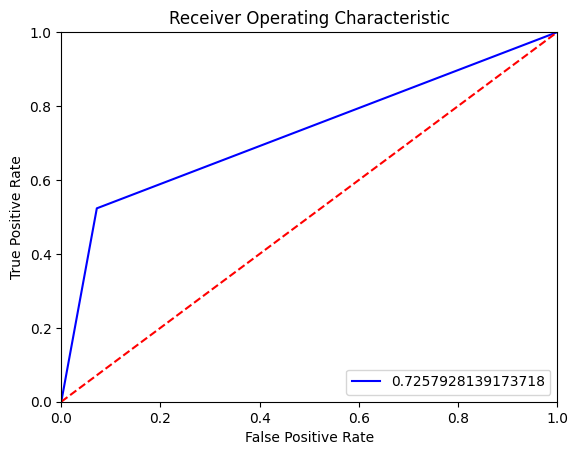

In [44]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

AUC:
1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)
3. Finally conclude upon the threshold which gives you an highest AUC closest to the overall AUC.

In [45]:
#Using cross validation
 
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.81826163 0.82791923 0.82704126 0.81694469 0.8213345  0.82696531
 0.82301274 0.82916118 0.82433026 0.8168643 ]
0.8231835089452373


In [46]:
#model tuning
# This code to be use only when there is a drastic difference between the K4 accuracy and the Base model accuracy
 
for train_value, test_value in kfold_cv.split(X_train, Y_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
 
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [47]:
# Classification Report Kfold

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Accuracy of the model: ",acc)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the results: ",acc)


[[7008  388]
 [1291 1075]]
Accuracy of the model:  0.8301577545584922
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.73      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the results:  0.8280065560335996


In [48]:
#Using cross validation
 
classifier=LogisticRegression()
 
#performing kfold_cross_validation uSing StratifiedKFLOD
from sklearn.model_selection import StratifiedKFold
kfold_cv=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.82396839 0.82748025 0.82396839 0.8143108  0.81387182 0.81598595
 0.83487044 0.82520861 0.82696531 0.82389108]
0.8230521036605702


In [49]:
#model tuning
# This code to be use only when there is a drastic difference between the K4 accuracy and the Base model accuracy
 
for train_value, test_value in kfold_cv.split(X_train, Y_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
 
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [50]:
# Classification Report for Stratified KFold

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Accuracy of the model: ",acc)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the results: ",acc)

[[7013  383]
 [1293 1073]]
Accuracy of the model:  0.8280065560335996
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.74      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the results:  0.8283138701085843


#### Feature Selection Using Recursive Feature ELimination

Recursive Feature Elimination: 1st-All the independent variables (X) will be considered and the model will be built. It will eliminate the variable which has the least significance in the model. 2nd-(X-1) variables will be considered and the model will be rebuilt. The process continues till the time we are left off with the given no of variables in the model. RFE model will be ready to predict upon the testing data.

---------------

In [51]:
colname=adult_df_rev.columns

from sklearn.feature_selection import RFE
rfe = RFE(classifier, n_features_to_select=8)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_) 

Num Features:  8
Selected Features: 
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 2 1 1 4 1 3 1 1 1 1 5]


In [52]:
Y_pred = model_rfe.predict(X_test)
# print(list(zip(Y_test,Y_pred)))

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Accuracy of the model: ",acc)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the results: ",acc)

[[7014  382]
 [1281 1085]]
Accuracy of the model:  0.8283138701085843
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7396
           1       0.74      0.46      0.57      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the results:  0.8296455644335177


"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""


in case the RFE eliminates logically relevant variables, create a  new df manually by subsetting the variables derived from RFE as well as on the basis of domain knowledge.
rest of the model building steps will have to be performed manually

#### Sequential Feature Selecor

SFS is a forward feature selection technique where it iteratively starts with one variable and keeps on adding variables one by one to the model. It perform the cross validation(CV) process to identify which combination of variables returns the highest CV accuracy. We can select the best combination and procede to build the model using the manual approach.

In [54]:
# Installing mlxtend for Sequential Feature Selector

# !pip install mlxtend

In [55]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#Define Sequential Forward Selection (sfs)
sffs = SFS(LogisticRegression(),
           k_features="best",
           forward=True,
           scoring = 'accuracy',
           cv = 5)
#Use SFS to select the top features 
feature_names=adult_df_rev.columns[:-1]
sffs.fit(X_train, Y_train)
 
#Create a dataframe for the SFS results 
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(8,)","[0.8008781558726674, 0.801536772777168, 0.8017...",0.799605,"(8,)"
2,"(8, 9)","[0.8059275521405049, 0.8182217343578485, 0.814...",0.811811,"(8, 9)"
3,"(4, 8, 9)","[0.8052689352360044, 0.817563117453348, 0.8138...",0.811109,"(4, 8, 9)"
4,"(4, 8, 9, 11)","[0.8050493962678376, 0.817563117453348, 0.8133...",0.810801,"(4, 8, 9, 11)"
5,"(3, 4, 8, 9, 11)","[0.8046103183315039, 0.8129527991218441, 0.812...",0.809045,"(3, 4, 8, 9, 11)"
6,"(1, 3, 4, 8, 9, 11)","[0.8041712403951702, 0.811635565312843, 0.8133...",0.808825,"(1, 3, 4, 8, 9, 11)"
7,"(1, 3, 4, 6, 8, 9, 11)","[0.8032930845225027, 0.8114160263446761, 0.810...",0.807684,"(1, 3, 4, 6, 8, 9, 11)"
8,"(1, 3, 4, 6, 7, 8, 9, 11)","[0.8021953896816685, 0.8103183315038419, 0.807...",0.805269,"(1, 3, 4, 6, 7, 8, 9, 11)"
9,"(1, 2, 3, 4, 6, 7, 8, 9, 11)","[0.811635565312843, 0.8199780461031834, 0.8149...",0.815324,"(1, 2, 3, 4, 6, 7, 8, 9, 11)"
10,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11)","[0.8267837541163556, 0.8298572996706916, 0.819...",0.824852,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11)"


In [56]:
X = adult_df_rev.values[:,[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]]
Y = adult_df_rev.values[:,-1]

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
# X = scaler.fit_transform(X)
# print(X)

In [58]:
from sklearn.model_selection import train_test_split

#Split the data into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [59]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()
#train the model object
classifier.fit(X_train,Y_train)

#print intercept and coefficients
print(classifier.intercept_)  # this is "Beta 0"
print(classifier.coef_) # this gives Beta value

[-1.42714623]
[[-0.1412722   0.84983536 -0.48237773 -0.00800775 -0.35187158  0.11458028
   0.41768973  2.42712978  0.29431278  0.01192528]]


In [60]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Accuracy of the model: ",acc)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the results: ",acc)

[[7010  386]
 [1272 1094]]
Accuracy of the model:  0.8296455644335177
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7396
           1       0.74      0.46      0.57      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.71      0.73      9762
weighted avg       0.82      0.83      0.82      9762

Accuracy of the results:  0.8301577545584922


##### Feature Selection Using Univariance Selection

Select K Best uses the chi square statistical test to find out the association of all the X variables with respect to Y.
Based on the K value provided it will subset K top chisqure valued variables and return us the subsetted data where the model building aproach would be manual. This Technique is preferred when we have more of categorical variables.

In [62]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
test = SelectKBest(score_func=chi2, k=9)
fit1 = test.fit(X, Y)
 
colname=adult_df_rev.columns
 
print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X_new = fit1.transform(X)

[8.59031713e+03 7.34809224e+01 2.39903589e+03 1.12172183e+03
 1.08184439e+01 3.65821506e+03 3.30121759e+01 5.01968535e+02
 8.21362443e+07 1.37062169e+06 6.46886542e+03 1.73837673e+01]
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_new)
X = scaler.transform(X_new)

In [65]:
from sklearn.model_selection import train_test_split

#Split the data into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [66]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()
#train the model object
classifier.fit(X_train,Y_train)

#print intercept and coefficients
print(classifier.intercept_)  # this is "Beta 0"
print(classifier.coef_) # this gives Beta value

[-1.5049879]
[[ 0.47037966 -0.17392553  0.82467515 -0.34646805 -0.20552606  0.43005862
   2.32224263  0.28106499  0.35517072]]


In [67]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Accuracy of the model: ",acc)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the results: ",acc)

[[7011  385]
 [1297 1069]]
Accuracy of the model:  0.8301577545584922
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.74      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the results:  0.827699241958615


#### Variance Threshold


VT identifies the variance of each X variable and eliminates those variables which have a variance lower than the set threshold.
By default it will eliminate only those variables which has 0 variety(singular Data).
Usually the Max Threshold that we try to set is upto 0.2 which indicates eliminate those variables which have less than 20% variety in the data.

In [97]:
# creating X and Y again because if the data is standard scaled then all the variables will have variance as 1 
# and none of them will get eliminated through variance threshold

X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [98]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.3)
fit1 = vt.fit(X, Y)
print(fit1.variances_)
 
features = fit1.transform(X)
print(features.shape[1])
print(list(zip(adult_df_rev.columns,fit1.get_support())))

[1.85988878e+02 2.50443138e+00 6.61309308e+00 2.26887148e+00
 1.87418890e+01 2.58257530e+00 7.20519181e-01 2.21358466e-01
 5.45802374e+07 1.62486094e+05 1.52440987e+02 3.69753284e+01]
11
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', False), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]


In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(features)
X = scaler.transform(features)

In [100]:
from sklearn.model_selection import train_test_split

#Split the data into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [101]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()
#train the model object
classifier.fit(X_train,Y_train)

#print intercept and coefficients
print(classifier.intercept_)  # this is "Beta 0"
print(classifier.coef_) # this gives Beta value

[-1.48196736]
[[ 0.44262727 -0.16013292  0.80098819 -0.33983836 -0.00527025 -0.45751918
   0.10891282  2.33297774  0.28165715  0.37658078  0.00411394]]


In [102]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Accuracy of the model: ",acc)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the results: ",acc)

[[7007  389]
 [1318 1048]]
Accuracy of the model:  0.8281089940585945
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.73      0.44      0.55      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.72      9762
weighted avg       0.81      0.83      0.81      9762

Accuracy of the results:  0.8251382913337431


In [71]:
# import pandas as pd

# df = pd.read_csv("Sales_data.xlsx")

# ac_sales_df = df[df['category'] == 'AC']

# daywise_ac_sales = ac_sales_df.groupby('date')['sales'].sum().reset_index()

# daywise_ac_sales.to_csv('test_data.csv', index=False)